In [1]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
import os
import sys
import re

import numpy as np
import pandas as pd

import json

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')

from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
review = pd.read_csv("/content/drive/MyDrive/Project/[SJU]창의학기제/lecture_evaluation_2021/data/review_datal_all.csv")

In [ ]:
!pip install kss

     |████████████████████████████████| 71kB 3.6MB/s 


In [ ]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
     |████████████████████████████████| 19.4MB 30.3MB/s 
     |████████████████████████████████| 92kB 9.2MB/s 
     |████████████████████████████████| 460kB 34.6MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-05-18 07:37:30--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22cd:e0db, 2406:da00:ff00::6b17:d1f5, ...
Co

# sentence split dataset

In [ ]:
data = review["text"]

NameError: ignored

In [ ]:
sentences = []
import kss
for doc in data:
  sentences += kss.split_sentences(doc)

In [ ]:
sentences = [sentence.split('. ') for sentence in sentences]

In [ ]:
pseudo_sentence=[]
for sentence in sentences:
  pseudo_sentence += sentence

In [ ]:
df_sentence = pd.DataFrame(pseudo_sentence, columns= ['text'])
df_sentence.to_csv("/content/drive/MyDrive/Project/창의학기제/lecture_evaluation_2021/data/pseudo_dataset.csv")

In [ ]:
df_sentence

,text
0,판례평석 잘하면 성적잘 주시는것 같음
1,중간 개망치고 기말도 틀린 문제 몇 개 있었는데 판례평석 과제 평가는 전부 A+이었음
2,성적도 결국 A+ 나옴.
3,과제들 되게 귀찮고 많다 시험은 말빨 좋으면 된다 난 시험은 망쳤지만 과제는 열심히...
4,수업은 ppt 띄워놓으시고 하시는데 보통 교안에 없는 다른 관련 사례를 중심으로 많...
...,...
18232,생각보다 공부하는 사람이 몇 없는 것 같아서 공부만 했다면 성적은 수월하게 가져갈 ...
18233,문제는 꼬는 것 없이 공부만 했다면 바로 풀 수 있을 정도입니다.
18234,깔끔한 문제 유형이에요.
18235,팀플은 한 번 있고 점수에 크게 반영되지 않아서 어느 정도만 하면 될 듯합니다


# EDA

In [ ]:
#stopwords설정
stopwords = pd.read_table('/content/drive/MyDrive/Project/[SJU]창의학기제/lecture_evaluation_2021/data/한국어불용어100.txt',header=None, names = ['stopword','c2','c3'])
stopwords = list(stopwords['stopword'])
stopwords+=['수업','교수','과제','강의','시험','했', '습니다', '거', '님', '었', '어','지만','학점','시','점수','기','았']

In [ ]:
pseudo_data = pd.read_csv("/content/drive/MyDrive/Project/[SJU]창의학기제/lecture_evaluation_2021/data/pseudo_dataset.csv")

#전처리
pseudo_data['text'] = pseudo_data['text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 한글과 공백을 제외하고 모두 제거
pseudo_data['text'].replace('', np.nan, inplace=True)
print(pseudo_data.isnull().sum())
pseudo_data = pseudo_data.dropna(axis=0)

#토큰화
mecab = Mecab() 
pseudo_data['tokenized'] = pseudo_data['text'].apply(mecab.morphs)
pseudo_data['tokenized'] = pseudo_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])
X_pseudo = pseudo_data['tokenized']

Unnamed: 0     0
text          93
dtype: int64


문장의 평균 길이 : 9.270227072310405


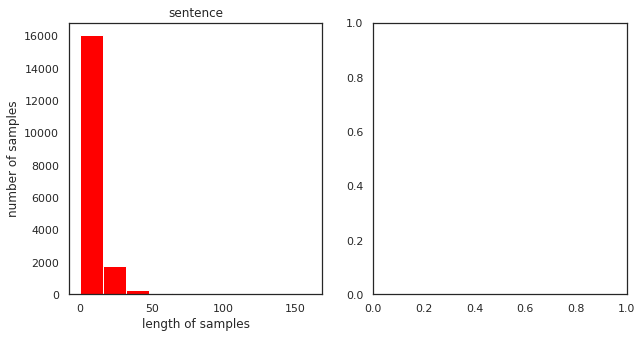

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = pseudo_data['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('sentence')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('문장의 평균 길이 :', np.mean(text_len))

In [ ]:
max(text_len)

161